In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns

%matplotlib inline

from IPython.display import Image

In [2]:
heart_df = pd.read_csv('./DataSet/heart.csv')

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_df.shape

(303, 14)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
X = heart_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = heart_df['target']

In [11]:
Y = np.array((Y - Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) #axis=0 -> It is applied to all the rows

In [12]:
print(X)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.950624  0.679881  1.969864  0.762694 -0.255910  2.390484 -1.004171   
1   -1.912150  0.679881  1.000921 -0.092585  0.072080 -0.416945  0.897478   
2   -1.471723 -1.465992  0.031978 -0.092585 -0.815424 -0.416945 -1.004171   
3    0.179877  0.679881  0.031978 -0.662770 -0.198030 -0.416945  0.897478   
4    0.289984 -1.465992 -0.936965 -0.662770  2.078611 -0.416945  0.897478   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.289984 -1.465992 -0.936965  0.477601 -0.101562 -0.416945  0.897478   
299 -1.031296  0.679881  1.969864 -1.232956  0.342190 -0.416945  0.897478   
300  1.501157  0.679881 -0.936965  0.705675 -1.027653  2.390484  0.897478   
301  0.289984  0.679881 -0.936965 -0.092585 -2.223854 -0.416945  0.897478   
302  0.289984 -1.465992  0.031978 -0.092585 -0.198030 -0.416945 -1.004171   

      thalach    exang   oldpeak     slope        ca      thal  
0    0.015

In [13]:
print(Y)

[ 0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882  0.91301882
  0.91301882  0.91301882  0.91301882  0.91301882  0

### Working on the Gradient Descent Algorithm

In [14]:
Image(url= "Image/StepsForGradientDescent.png")

In [15]:
def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)
    b = random.random()      # b -> beta0 (bias or intercept)
    w = np.random.rand(dim)  # w -> beta1 (feature weight)
    return b,w

In [16]:
def predict_Y(b,w,x):
    return b + np.matmul(x,w)

In [17]:
def get_cost(Y,Y_hat):
    Y_resid = Y - Y_hat
    return np.sum(np.matmul(Y_resid.T, Y_resid))/len(Y_resid)

In [18]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    db = (np.sum(y_hat - y)*2)/len(y)
    dw = (np.dot(y_hat - y, x)*2)/len(y)
    b_1 = b_0 - learning_rate*db
    w_1 = w_0 - learning_rate*dw
    return b_1, w_1

In [19]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):
    b,w = initialize(X.shape[1])
    
    iter_num = 0
    gd_iteration_df = pd.DataFrame(columns=['Iterations','Cost'])
    result_idx = 0
    
    for each_iter in range(num_iterations):
        y_hat = predict_Y(b, w, X)
        this_cost = get_cost(Y, y_hat)
        prev_b = b
        prev_w = w
        b, w = update_beta(X, Y, y_hat, prev_b, prev_w, alpha)
        
        if iter_num%10==0:
            gd_iteration_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
        iter_num = iter_num + 1
    
    print("\nFinal Estimate of b is {} \n w is {}".format(b,w))
    return gd_iteration_df, b, w

In [20]:
gid, b , w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)


Final Estimate of b is 0.42844895817391493 
 w is [0.17489273 0.49510225 0.70118669 0.27438212 0.06249845 0.00677069
 0.13890371 0.85186318 0.31733192 0.29896375 0.18352353 0.48662455
 0.3574579 ]


In [21]:
gid.head(20)

,Iterations,Cost
0,0.0,9.376909
1,10.0,8.785926
2,20.0,8.243039
3,30.0,7.743802
4,40.0,7.284208
5,50.0,6.860642
6,60.0,6.469848
7,70.0,6.108885
8,80.0,5.775100
9,90.0,5.466095


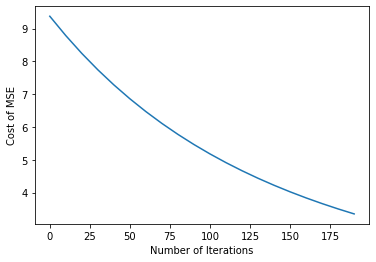

In [22]:
plt.plot(gid['Iterations'],gid['Cost'])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost of MSE')
plt.show()

In [23]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha=0.1, num_iterations=2000)
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)
alpha_df_3, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)
alpha_df_4, b, w = run_gradient_descent(X, Y, alpha=0.0001, num_iterations=2000)


Final Estimate of b is -6.271102523981385e-17 
 w is [-0.014937   -0.1830988   0.23317503 -0.0699988  -0.03673396  0.01240582
  0.05254851  0.13863953 -0.13566011 -0.13683504  0.09756498 -0.20623343
 -0.14611027]

Final Estimate of b is -5.998397015702797e-17 
 w is [-0.01493697 -0.18309879  0.23317503 -0.06999881 -0.03673397  0.01240581
  0.05254851  0.13863957 -0.13566009 -0.13683508  0.09756494 -0.20623342
 -0.14611027]

Final Estimate of b is 0.011664695556930303 
 w is [ 0.03566807 -0.17329831  0.27600757 -0.08635701 -0.04145347 -0.01574182
  0.06678565  0.23549895 -0.05319714 -0.11438976  0.09934815 -0.17545142
 -0.1648434 ]

Final Estimate of b is 0.4286034542113327 
 w is [0.17517122 0.49551784 0.70107311 0.27472357 0.06260663 0.00696353
 0.13876063 0.85166111 0.31767097 0.29944636 0.18323055 0.48711162
 0.35795044]


Text(0.5, 1.0, 'Heart Disease Prediction using Gradient Descent Algorithm')

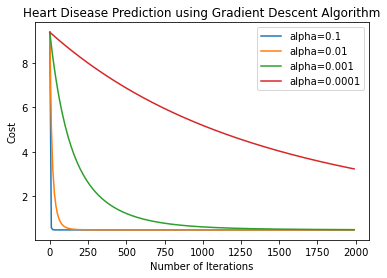

In [24]:
plt.plot(alpha_df_1['Iterations'],alpha_df_1['Cost'],label='alpha=0.1')
plt.plot(alpha_df_2['Iterations'],alpha_df_2['Cost'],label='alpha=0.01')
plt.plot(alpha_df_3['Iterations'],alpha_df_3['Cost'],label='alpha=0.001')
plt.plot(alpha_df_4['Iterations'],alpha_df_4['Cost'],label='alpha=0.0001')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Heart Disease Prediction using Gradient Descent Algorithm')